# SIR Modelling

In [21]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [22]:
df_analyse=pd.read_csv(r"C:\Users\jaina\eds_covid-19_analysis\data\processed\COVID_small_flat_table.csv",sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,date,Italy,US,Spain,Germany,India,Canada,Russia,Switzerland
895,2022-07-05,18938771,88065902,12890002,28673212,43547809,3963521,18176132,3805774
896,2022-07-06,19048788,88262908,12890002,28808614,43566739,3964556,18179254,3805774
897,2022-07-07,19157174,88381589,12890002,28926346,43585554,3973323,18182578,3805774
898,2022-07-08,19259037,88547882,12973615,29022265,43604394,3976889,18185995,3805774
899,2022-07-09,19357938,88572807,12973615,29022265,43622651,3978349,18189499,3805774


In [23]:
df_analyse.Germany[35]

21

In [24]:
N0=1000000 #max susceptible population 
beta=0.8  # recovery coefficient
gamma=0.1  # Transmission coefficient
# beta/gamma is known as reproduction rate, it is chosen as 4 meaning 1 person can infect 4 people
# condition I0+S0+R0=N0
I0=df_analyse.Italy[35]
S0=N0-I0
R0=0

In [25]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        dS+dI+dR=0
        S+I+R= N (constant population size)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

**Simulative approach to calculate SIR curves**

In [26]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\3252408798.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],


In [27]:
propagation_rates

,susceptible,infected,recoverd,recovered
0,999184.764167,769.935833,NaN,45.300000
1,998569.317644,1308.388772,NaN,122.293583
2,997524.104137,2222.763402,NaN,253.132461
3,995750.29608,3774.295119,NaN,475.408801
4,992743.691695,6403.469993,NaN,852.838313
5,987658.088143,10848.726545,NaN,1493.185312
6,979086.222128,18335.719906,NaN,2578.057966
7,964724.421542,30863.948501,NaN,4411.629957
8,940904.257651,51597.717542,NaN,7498.024807
9,902065.447954,85276.755485,NaN,12657.796561


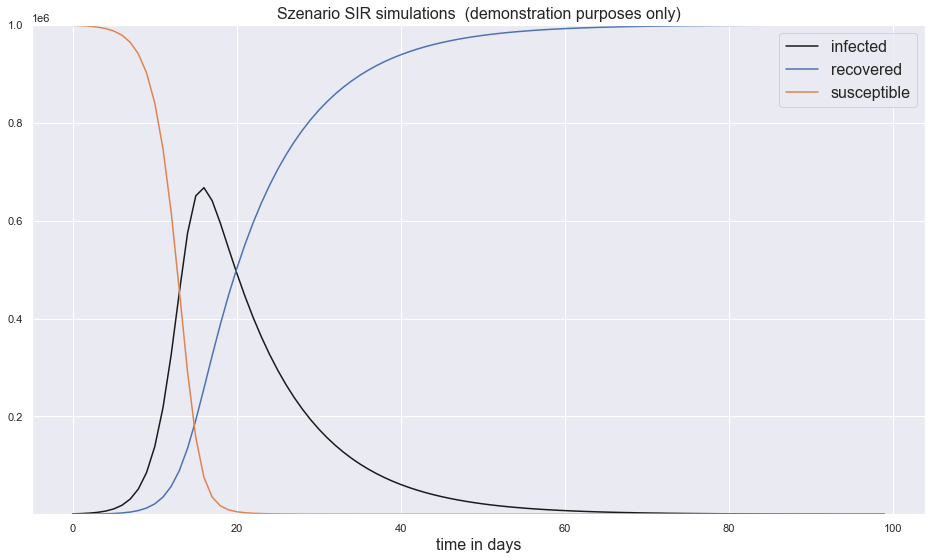

In [28]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**SIR Modelling parameter fitting**

In [9]:
ydata = np.array(df_analyse.Germany[35:])
t=np.arange(len(ydata))

In [10]:
# re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.8

In [11]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [12]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # only dI is expected

In [13]:
# curve for diff. equation
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([ 2.10000000e+01,  2.83467442e+01,  3.82635349e+01,  5.16492851e+01,
        6.97171980e+01,  9.41045567e+01,  1.27020786e+02,  1.71447062e+02,
        2.31405299e+02,  3.12320402e+02,  4.21507742e+02,  5.68828389e+02,
        7.67568562e+02,  1.03561758e+03,  1.39704132e+03,  1.88417601e+03,
        2.54040014e+03,  3.42377774e+03,  4.61179988e+03,  6.20746901e+03,
        8.34695108e+03,  1.12089170e+04,  1.50254352e+04,  2.00937383e+04,
        2.67872046e+04,  3.55622587e+04,  4.69554712e+04,  6.15620761e+04,
        7.99843269e+04,  1.02737867e+05,  1.30110563e+05,  1.61985487e+05,
        1.97668411e+05,  2.35790176e+05,  2.74361695e+05,  3.11019967e+05,
        3.43420416e+05,  3.69650711e+05,  3.88523547e+05,  3.99666850e+05,
        4.03424001e+05,  4.00642226e+05,  3.92438005e+05,  3.80000472e+05,
        3.64456984e+05,  3.46798540e+05,  3.27850544e+05,  3.08272539e+05,
        2.88573617e+05,  2.69134372e+05,  2.50230013e+05,  2.32051744e+05,
        2.14725295e+05,  

The curves needs to be fitted. Beta and gamma are the free paramaters.

**Dynamic beta in SIR (Infection Rate)**

In [29]:
t_initial=28
t_intro_measures=14
t_hold=21
t_relax=21

beta_max=0.4
beta_min=0.11
gamma=0.1
pd_beta=np.concatenate((np.array(t_initial*[beta_max]),
                       np.linspace(beta_max,beta_min,t_intro_measures),
                       np.array(t_hold*[beta_min]),
                        np.linspace(beta_min,beta_max,t_relax),
                       ))

In [30]:
pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.37769231,
       0.35538462, 0.33307692, 0.31076923, 0.28846154, 0.26615385,
       0.24384615, 0.22153846, 0.19923077, 0.17692308, 0.15461538,
       0.13230769, 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.1245    ,
       0.139     , 0.1535    , 0.168     , 0.1825    , 0.197     ,
       0.2115    , 0.226     , 0.2405    , 0.255     , 0.2695 

In [31]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recovered':R0})



for each_beta in pd_beta:
   
    new_delta_vec=SIR_model(SIR,each_beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\2054304610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\2054304610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\2054304610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\2054304610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\2054304610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\2054304610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\2054304610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\2054304610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\2054304610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\2054304610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\2054304610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\2054304610.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

In [32]:
propagation_rates

,susceptible,infected,recovered
0,999365.882084,588.817916,45.3
1,999130.504269,765.313939,104.181792
2,998824.644868,994.641946,180.713186
3,998427.255713,1292.566907,280.17738
4,997911.042101,1679.523828,409.434071
5,997240.635951,2181.977595,577.386454
6,996370.253261,2834.162525,795.584213
7,995240.703168,3680.296366,1079.000466
8,993775.590871,4777.379027,1447.030102
9,991876.533805,6198.69819,1924.768005


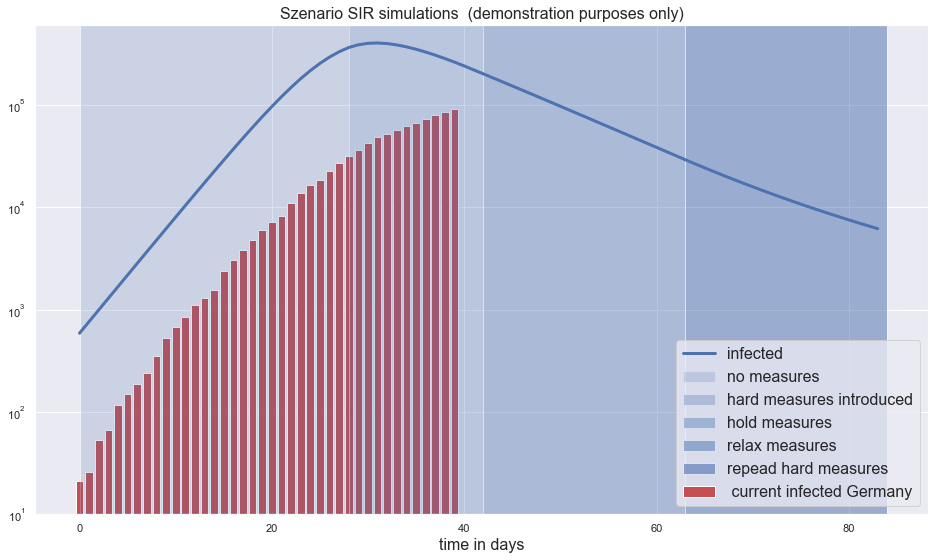

In [33]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',linewidth=3)

t_phases=np.array([t_initial,t_intro_measures,t_hold,t_relax]).cumsum()
ax1.bar(np.arange(len(ydata[0:40])),ydata[0:40],width = 0.8,label=' current infected Germany',color='r')
ax1.axvspan(0,t_phases[0], facecolor='b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0],t_phases[1],  facecolor='b', alpha=0.3,label='hard measures introduced')
ax1.axvspan(t_phases[1],t_phases[2], facecolor='b', alpha=0.4,label='hold measures')
ax1.axvspan(t_phases[2],t_phases[3], facecolor='b', alpha=0.5,label='relax measures')
ax1.axvspan(t_phases[3],len(propagation_rates.infected), facecolor='b', alpha=0.6,label='repead hard measures')

ax1.set_ylim(10, 1.5*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [34]:
t_phases

array([28, 42, 63, 84])

# SIR fit curve - Dynamic Dashboard

* Dynamic dashoard for fit curve
* SIR curve of various countries


In [35]:
df_analyse=pd.read_csv(r"C:\Users\jaina\eds_covid-19_analysis\data\processed\COVID_small_flat_table.csv",sep=';')  
df_analyse.sort_values('date',ascending=True).tail()

,date,Italy,US,Spain,Germany,India,Canada,Russia,Switzerland
895,2022-07-05,18938771,88065902,12890002,28673212,43547809,3963521,18176132,3805774
896,2022-07-06,19048788,88262908,12890002,28808614,43566739,3964556,18179254,3805774
897,2022-07-07,19157174,88381589,12890002,28926346,43585554,3973323,18182578,3805774
898,2022-07-08,19259037,88547882,12973615,29022265,43604394,3976889,18185995,3805774
899,2022-07-09,19357938,88572807,12973615,29022265,43622651,3978349,18189499,3805774


In [36]:
# Extracting data of desired countries
df_an = df_analyse[['date','Italy','Germany','Canada']]
df_an

,date,Italy,Germany,Canada
0,2020-01-22,0,0,0
1,2020-01-23,0,0,2
2,2020-01-24,0,0,3
3,2020-01-25,0,0,3
4,2020-01-26,0,0,3
...,...,...,...,...
895,2022-07-05,18938771,28673212,3963521
896,2022-07-06,19048788,28808614,3964556
897,2022-07-07,19157174,28926346,3973323
898,2022-07-08,19259037,29022265,3976889


In [37]:
df_an = df_an.iloc[35:,]
df_an

,date,Italy,Germany,Canada
35,2020-02-26,453,21,20
36,2020-02-27,655,26,22
37,2020-02-28,888,53,28
38,2020-02-29,1128,66,33
39,2020-03-01,1694,117,38
...,...,...,...,...
895,2022-07-05,18938771,28673212,3963521
896,2022-07-06,19048788,28808614,3964556
897,2022-07-07,19157174,28926346,3973323
898,2022-07-08,19259037,29022265,3976889


In [38]:
N0=1000000 #max susceptible population 
beta=0.4  # recovery coefficient
gamma=0.1  # Transmission coefficient

# Generating a dataframe of infected, recovered and susceptible population of the selected countries
df = pd.DataFrame()
country_list = ['Italy','Germany','Canada']
for country in country_list:
    I0 = df_an._get_value(35,country)
    S0=N0-I0
    R0=0
    
    dict1 = {'country': country, 'susceptible':S0, 'infected':I0,'recovered':R0}
                                           
    
    
    df = df.append(dict1, ignore_index=True)
print(df)

   country  susceptible  infected  recovered
0    Italy       999547       453          0
1  Germany       999979        21          0
2   Canada       999980        20          0


C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1774719793.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict1, ignore_index=True)
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1774719793.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict1, ignore_index=True)
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1774719793.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dict1, ignore_index=True)


**Simulative approach to calculate SIR curve**

In [39]:
N0=1000000 #max susceptible population 
beta=0.4  # recovery coefficient
gamma=0.1  # Transmission coefficient
propagation_rates=pd.DataFrame(index = [country],columns={'susceptible':S0,
                                           'infected':I0,
                                           'recoverd':R0})

def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

country_list = ['Italy','Germany','Canada']
for country in country_list:
    I0 = df_an._get_value(35,country)
    S0=N0-I0
    R0=0
    
    SIR=np.array([S0,I0,R0])
    
    for each_t in np.arange(100):
        new_delta_vec=SIR_model(SIR,beta,gamma)
   
        SIR=SIR+new_delta_vec
    
        propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


        
print(propagation_rates.head())

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be rem

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'country': country,'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1214116858.py:40: FutureWarning: The frame.append method is deprecated and will be rem

     susceptible     infected recoverd country   recovered
0            NaN          NaN      NaN     NaN         NaN
1  999365.882084   588.817916      NaN   Italy   45.300000
2  999130.504269   765.313939      NaN   Italy  104.181792
3  998824.644868   994.641946      NaN   Italy  180.713186
4  998427.255713  1292.566907      NaN   Italy  280.177380


**SIR_curve-Italy**

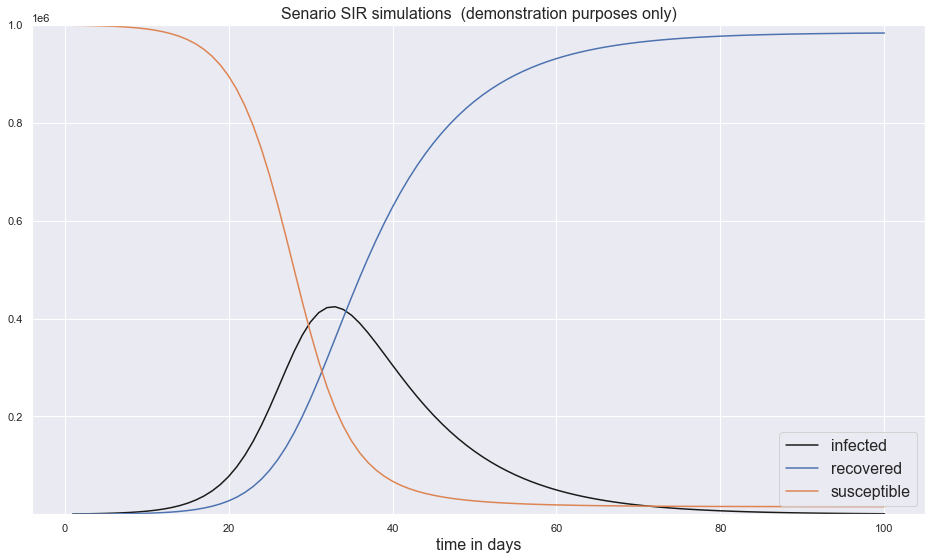

In [40]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[0:101],propagation_rates.infected[0:101],label='infected',color='k')
ax1.plot(propagation_rates.index[0:101],propagation_rates.recovered[0:101],label='recovered')
ax1.plot(propagation_rates.index[0:101],propagation_rates.susceptible[0:101],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**SIR_curve-Germany**

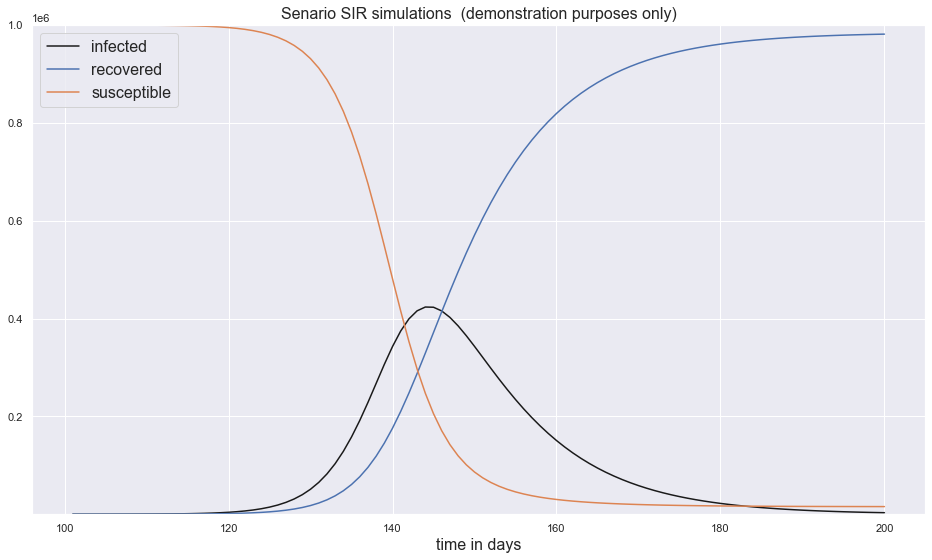

In [41]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[101:201],propagation_rates.infected[101:201],label='infected',color='k')
ax1.plot(propagation_rates.index[101:201],propagation_rates.recovered[101:201],label='recovered')
ax1.plot(propagation_rates.index[101:201],propagation_rates.susceptible[101:201],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**SIR_curve-Canada**

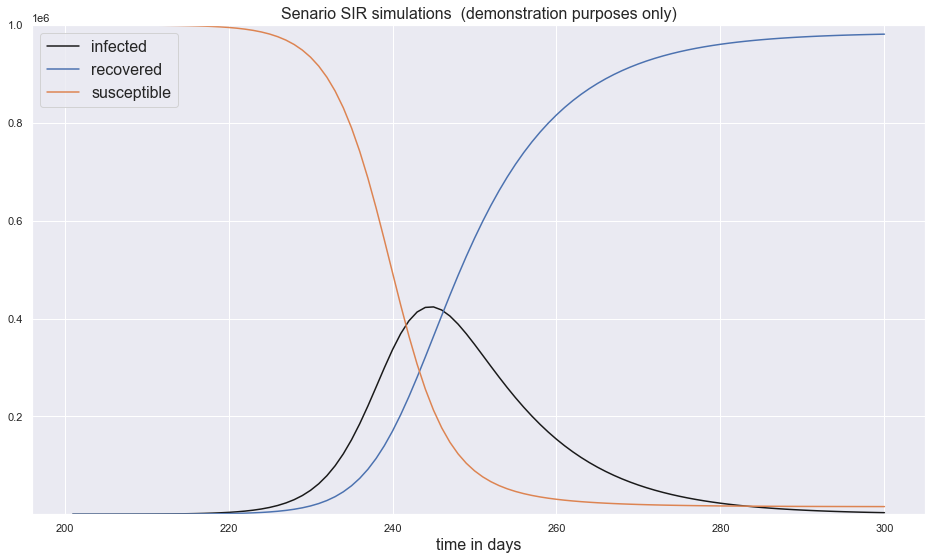

In [42]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index[201:301],propagation_rates.infected[201:301],label='infected',color='k')
ax1.plot(propagation_rates.index[201:301],propagation_rates.recovered[201:301],label='recovered')
ax1.plot(propagation_rates.index[201:301],propagation_rates.susceptible[201:301],label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Senario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**Fitting parameters for SIR Model**

In [43]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [44]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] 

In [45]:
country_list = ['Italy','Germany','Canada']
df1 = pd.DataFrame()
for country in country_list:
    ydata = np.array(df_analyse[country][35:])
    t = np.arange(len(ydata))
    # ensure re-initialization 
    I0=ydata[0]
    S0=N0-I0
    R0=0
    beta
    
    # example curve of our differential equationa
    popt=[0.4,0.1]
    fit_odeint(t, *popt)
    
    
    popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
    perr = np.sqrt(np.diag(pcov))
    
    print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
    print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
    
    
    # get the final fitted curve
    fitted=fit_odeint(t, *popt)
    df1 = df1.append({'country': country,'t': t, 'ydata':ydata,'fitted':fitted},ignore_index=True)
print(df1.T)

C:\Users\jaina\AppData\Roaming\Python\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [9.00087887e-04 4.00844156e-05]  start infect: 453
Optimal parameters: beta = 0.03165784273084917  and gamma =  -0.004626174119455648


C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1904698879.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'country': country,'t': t, 'ydata':ydata,'fitted':fitted},ignore_index=True)
C:\Users\jaina\AppData\Roaming\Python\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1295010750.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1295010750.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1295010750.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamm

standard deviation errors :  [72.35728773 71.48069283]  start infect: 21
Optimal parameters: beta = 1.099040688880007  and gamma =  0.8992177547019115


C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1295010750.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1295010750.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1295010750.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1295010750.py:17: RuntimeWarning: invalid value encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I


standard deviation errors :  [2.33648825e-04 1.77383350e-05]  start infect: 20
Optimal parameters: beta = 0.029526136487661635  and gamma =  -0.0027145281757723198
                                                         0  \
country                                              Italy   
t        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
ydata    [453, 655, 888, 1128, 1694, 2036, 2502, 3089, ...   
fitted   [453.0, 469.73164893040115, 487.08105543376274...   

                                                         1  \
country                                            Germany   
t        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
ydata    [21, 26, 53, 66, 117, 150, 188, 240, 349, 534,...   
fitted   [21.0, 25.643976813701325, 31.313957622732797,...   

                                                         2  
country                                             Canada  
t        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
ydata    [20, 22, 28, 33, 38, 4

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1904698879.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'country': country,'t': t, 'ydata':ydata,'fitted':fitted},ignore_index=True)


In [46]:
df1 

,country,t,ydata,fitted
0,Italy,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[453, 655, 888, 1128, 1694, 2036, 2502, 3089, ...","[453.0, 469.73164893040115, 487.08105543376274..."
1,Germany,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[21, 26, 53, 66, 117, 150, 188, 240, 349, 534,...","[21.0, 25.643976813701325, 31.313957622732797,..."
2,Canada,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[20, 22, 28, 33, 38, 45, 51, 59, 71, 90, 98, 1...","[20.0, 20.655308016875033, 21.332087230274322,..."


In [47]:
# Final dataframe
d_fin = pd.DataFrame({'timeline' : df1.t[0],'Italy_fitted': df1.fitted[0],  'Italy' : df1.ydata[0],
                  'Germany_fitted': df1.fitted[1],  'Germany' : df1.ydata[1],
                  'Canada_fitted': df1.fitted[2], 'Canada' : df1.ydata[2]})

d_fin

,timeline,Italy_fitted,Italy,Germany_fitted,Germany,Canada_fitted,Canada
0,0,4.530000e+02,453,2.100000e+01,21,2.000000e+01,20
1,1,4.697316e+02,655,2.564398e+01,26,2.065531e+01,22
2,2,4.870811e+02,888,3.131396e+01,53,2.133209e+01,28
3,3,5.050710e+02,1128,3.823614e+01,66,2.203104e+01,33
4,4,5.237251e+02,1694,4.668636e+01,117,2.275290e+01,38
...,...,...,...,...,...,...,...
860,860,2.043540e+07,18938771,-4.125418e-14,28673212,4.192176e+06,3963521
861,861,2.053016e+07,19048788,-4.122814e-14,28808614,4.203571e+06,3964556
862,862,2.062535e+07,19157174,-4.120210e-14,28926346,4.214997e+06,3973323
863,863,2.072099e+07,19259037,-4.117606e-14,29022265,4.226455e+06,3976889


**Curve for Italy**

* Original and fitted population

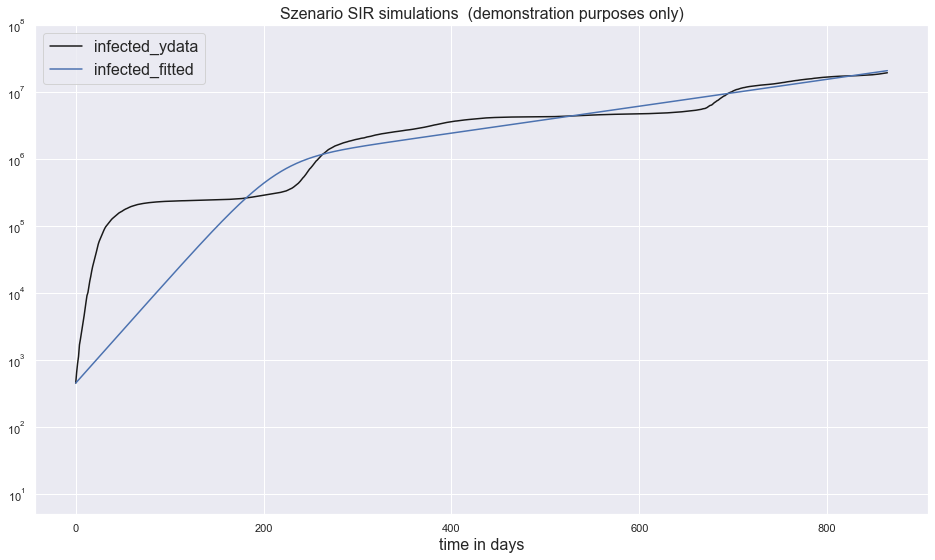

In [48]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[0],df1.ydata[0],label='infected_ydata',color='k')
ax1.plot(df1.t[0],df1.fitted[0],label='infected_fitted')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

**Curve for Canada**

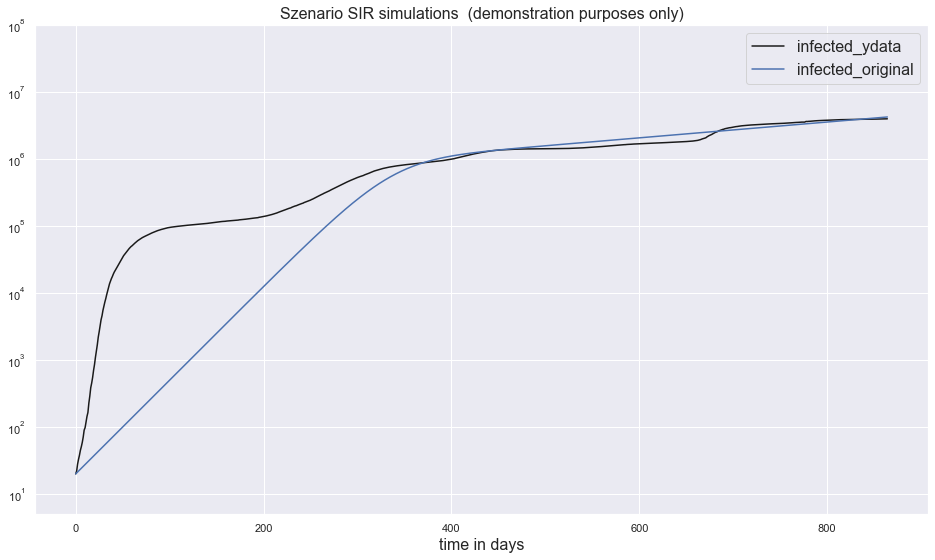

In [50]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(df1.t[2],df1.ydata[2],label='infected_ydata',color='k')
ax1.plot(df1.t[2],df1.fitted[2],label='infected_original')

ax1.set_ylim(5, 100000000)
ax1.set_yscale('log')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});


# Dynamic Dashboard

* Use of Dash Plotly

In [51]:
country_list = ['Italy','Germany','Canada']
country_list

['Italy', 'Germany', 'Canada']

In [52]:

import pandas as pd
import numpy as np

import dash
dash.__version__
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output,State

import plotly.graph_objects as go

import os



fig = go.Figure()

app = dash.Dash()
app.layout = html.Div([
    dcc.Markdown('''
    #  Dynamic Dashboard
    (Using Dash Plotly)

    Goal of the exercise is to select and visualize the fit of different countries.

    '''),
    
   
    html.Br(),
    html.Br(),

    dcc.Dropdown(
        id='country_drop_down',
        options=[ {'label': 'Italy','value':'Italy'},
                  {'label': 'Germany','value':'Germany'},
                  {'label': 'Canada','value':'Canada'}],
        value=['Italy'],# which are pre-selected
        placeholder = 'Multi-Select Country for Visualization',
        multi=True
    ),


    dcc.Graph(figure=fig, id='main_window_slope')
])

C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1066775513.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\jaina\AppData\Local\Temp\ipykernel_15896\1066775513.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [53]:
@app.callback(Output('main_window_slope', 'figure'),[Input('country_drop_down', 'value')])

def update_figure(country_list):
    
    traces = []
    for each in country_list:
        traces.append(dict(x=d_fin.timeline,y=d_fin[str(each + '_fitted')],mode='markers+lines',opacity=0.9,name=str(each+"_fitted")))
            
        traces.append(dict(x=d_fin.timeline,y=d_fin[each],mode='markers+lines',opacity=0.9,name= str(each+"_ydata")))

    return {
            'data': traces,
            'layout': dict(width=1280,height=720, title = 'Infected along with fit curve',
                            xaxis={'title':'Timeline','tickangle':-45,'nticks':20,'tickfont':dict(size=14,color="#7f7f7f")},
                            yaxis= {'type':"log",'range':'[1.1,5.5]'})}

In [ ]:
if __name__ == '__main__':

    app.run_server(port = 4086,debug=True, use_reloader=False)